*INTRO*

From 2019 to 2023, AI experienced a revolution driven by breakthroughs in computing power, MMLU benchmarks, and the efforts of leading organizations and entities. This era transformed AI from research prototypes into real-world systems, setting new standards in reasoning, performance, and global adoption.

*importing libraries*

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
warnings.filterwarnings('ignore')


*connect sql to vscode*

In [21]:
conn=mysql.connector.connect(host="localhost",
                             user="root",
                             password="password11",
                             database="xyz")


In [22]:
query="select*from aaai"
data=pd.read_sql(query,conn)
df=pd.DataFrame(data)

*EDA*

In [23]:
# --- Step 1: Basic Data Inspection ---
print("First 5 rows of the DataFrame:")
print(df.head())
print("\n--- Basic Info ---")
df.info()
print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))

First 5 rows of the DataFrame:
              Entity Code  Year   MMLU  computing_pet             Organization
0              BLOOM       2022  39.13      412000000  HuggingFace, BigScience
1       BloombergGPT       2023  39.18      212000000                Bloomberg
2         Chinchilla       2022  67.50      588000000          Google DeepMind
3           GLM-130B       2022  44.80      312000000             Tsinghua KEG
4  GPT-2 (finetuned)       2019  32.40          36000                   OpenAI

--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         19 non-null     object 
 1   Code           19 non-null     object 
 2   Year           19 non-null     int64  
 3   MMLU           19 non-null     float64
 4   computing_pet  19 non-null     int64  
 5   Organization   19 non-null     object 
dtypes: float64(1), i

In [24]:
# --- Step 2: Handling Missing Values ---
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Missing Values Check ---
Entity           0
Code             0
Year             0
MMLU             0
computing_pet    0
Organization     0
dtype: int64


QUE-*Which entries made the most contributions in 2022?*

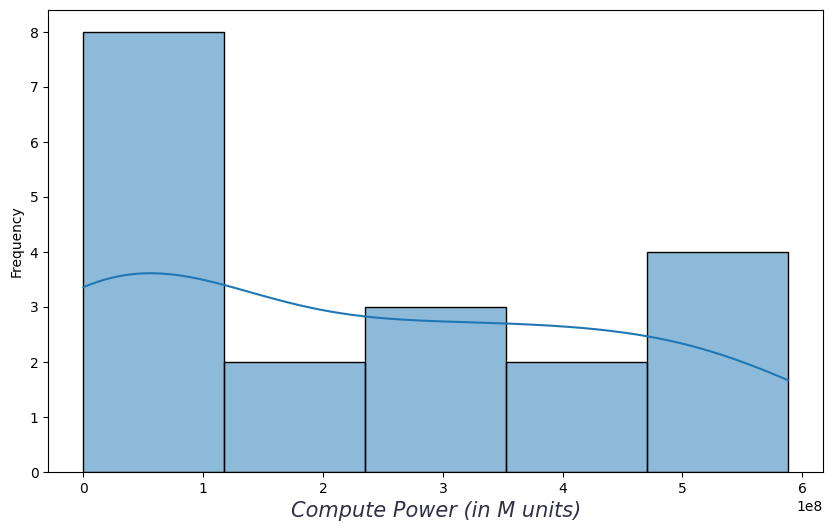

In [25]:
plt.figure(figsize=(10, 6))
df=pd.DataFrame(data)
sns.histplot(df['computing_pet'], kde=True, bins=5)
plt.xlabel('Compute Power (in M units)',fontsize=15,fontstyle="italic",color="#313146")
plt.ylabel('Frequency')
plt.show()

         Entity Code  Year   MMLU  computing_pet             Organization
0         BLOOM       2022  39.13      412000000  HuggingFace, BigScience
1    Chinchilla       2022  67.50      588000000          Google DeepMind
2      GLM-130B       2022  44.80      312000000             Tsinghua KEG
3  GPT-NeoX-20B       2022  33.60       21200000                 Eleuther
4           OPT       2022  35.99      172000000                  Meta AI
5    PaLM (62B)       2022  53.70      296000000          Google Research
6   PaLM (62B+)       2022  62.80      493000000          Google Research
7     PaLM (8B)       2022  25.30       37400000          Google Research


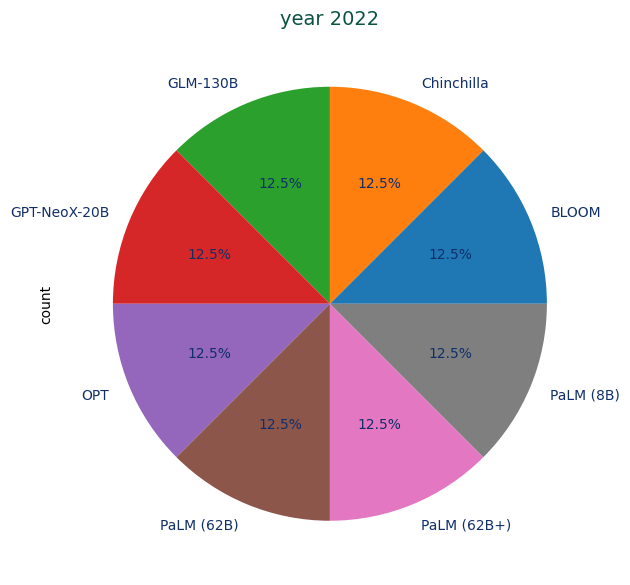

In [ ]:
query="select*from aaai where Year=2022 "
data=pd.read_sql(query,conn)
df=pd.DataFrame(data)
# Set plot title and labels with the specified styling
plt.title("year 2022",fontsize=14,color="#0A5341")
df["Entity"].value_counts().plot(kind="pie",autopct="%1.1f%%",figsize=(7,9),textprops={"color":"#102F69"})
df=pd.DataFrame(data)
print(df)
plt.show()

**insight**

👉DeepMind’s Chinchilla (2022) achieved the highest MMLU (67.5) with massive compute (~588M petaflops).

👉Google PaLM (2022) followed with 62.8 MMLU at ~493M compute.


QUE-*What is count Entity of each Organization by year?*

<Axes: title={'center': 'Total Entity by year '}, xlabel='Organization', ylabel='Total'>

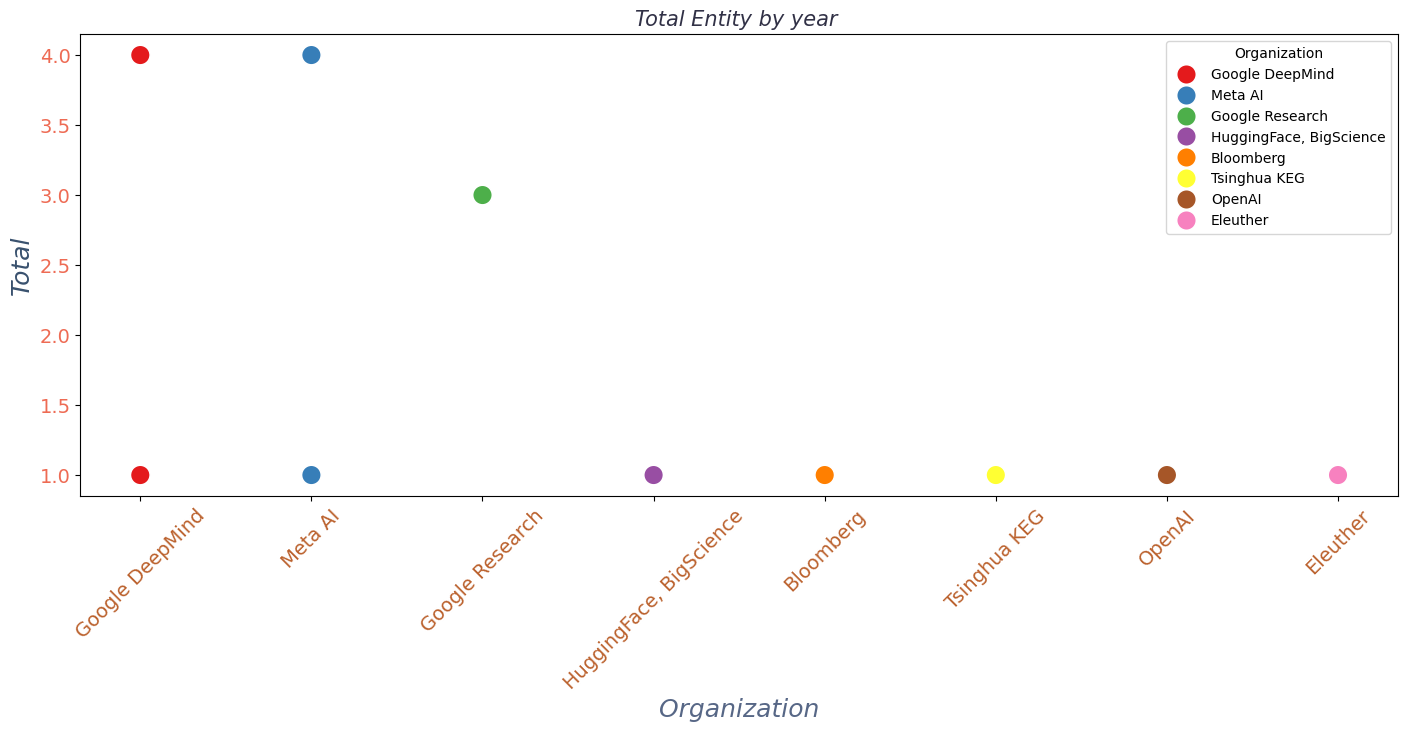

In [ ]:
quary2="""select Organization,Year ,count(Entity) as total
from xyz.aaai
group by Organization,Year
order by total desc;"""
# Set plot title and labels with the specified styling
plt.figure(figsize=(17,6))
data=pd.read_sql(quary2,conn)
df=pd.DataFrame(data)
plt.xlabel("Organization",fontsize=18,color="#576786",fontstyle="italic")
plt.ylabel("Total",fontsize=18,color="#39516E",fontstyle="italic")
plt.title("Total Entity by year ",fontsize=15,fontstyle="italic",color="#313146")
plt.xticks(fontsize=14,rotation=45,color="#BB612D")
plt.yticks(fontsize=14,color="#EE6B54")
sns.scatterplot(x="Organization",y="total",data=df,hue="Organization",s=200,palette="Set1")

*Insight*

2019–2020: Only 1 model per year reported.

2021: 4 major models.

2022: Jump to 8 reported models (peak).

2023: Slight dip (5 models, possibly incomplete).

Industry Insight: Explosive growth in 2021–22 reflects the AI boom, followed by consolidation.

QUE-*find who many entriies exist per year*

In [28]:

query3="""select year,count(*) as total_entries
from xyz.aaai
group by year
order by year desc;"""
data=pd.read_sql(query3,conn)
df=pd.DataFrame(data)
print(df)
plt.show()


   year  total_entries
0  2023              5
1  2022              8
2  2021              4
3  2020              1
4  2019              1


QUE-*find the Entity with the max computing_pet used*

          Entity  computing_pet             Organization  max_comut_pet
0     Chinchilla      588000000          Google DeepMind      588000000
1    LLaMA (65B)      548000000                  Meta AI      548000000
2  Gopher (280B)      504000000          Google DeepMind      504000000
3    PaLM (62B+)      493000000          Google Research      493000000
4          BLOOM      412000000  HuggingFace, BigScience      412000000


<Axes: title={'center': 'top 5 Organization based on max_comut_pet '}, xlabel='Organization', ylabel='max_comput_pet'>

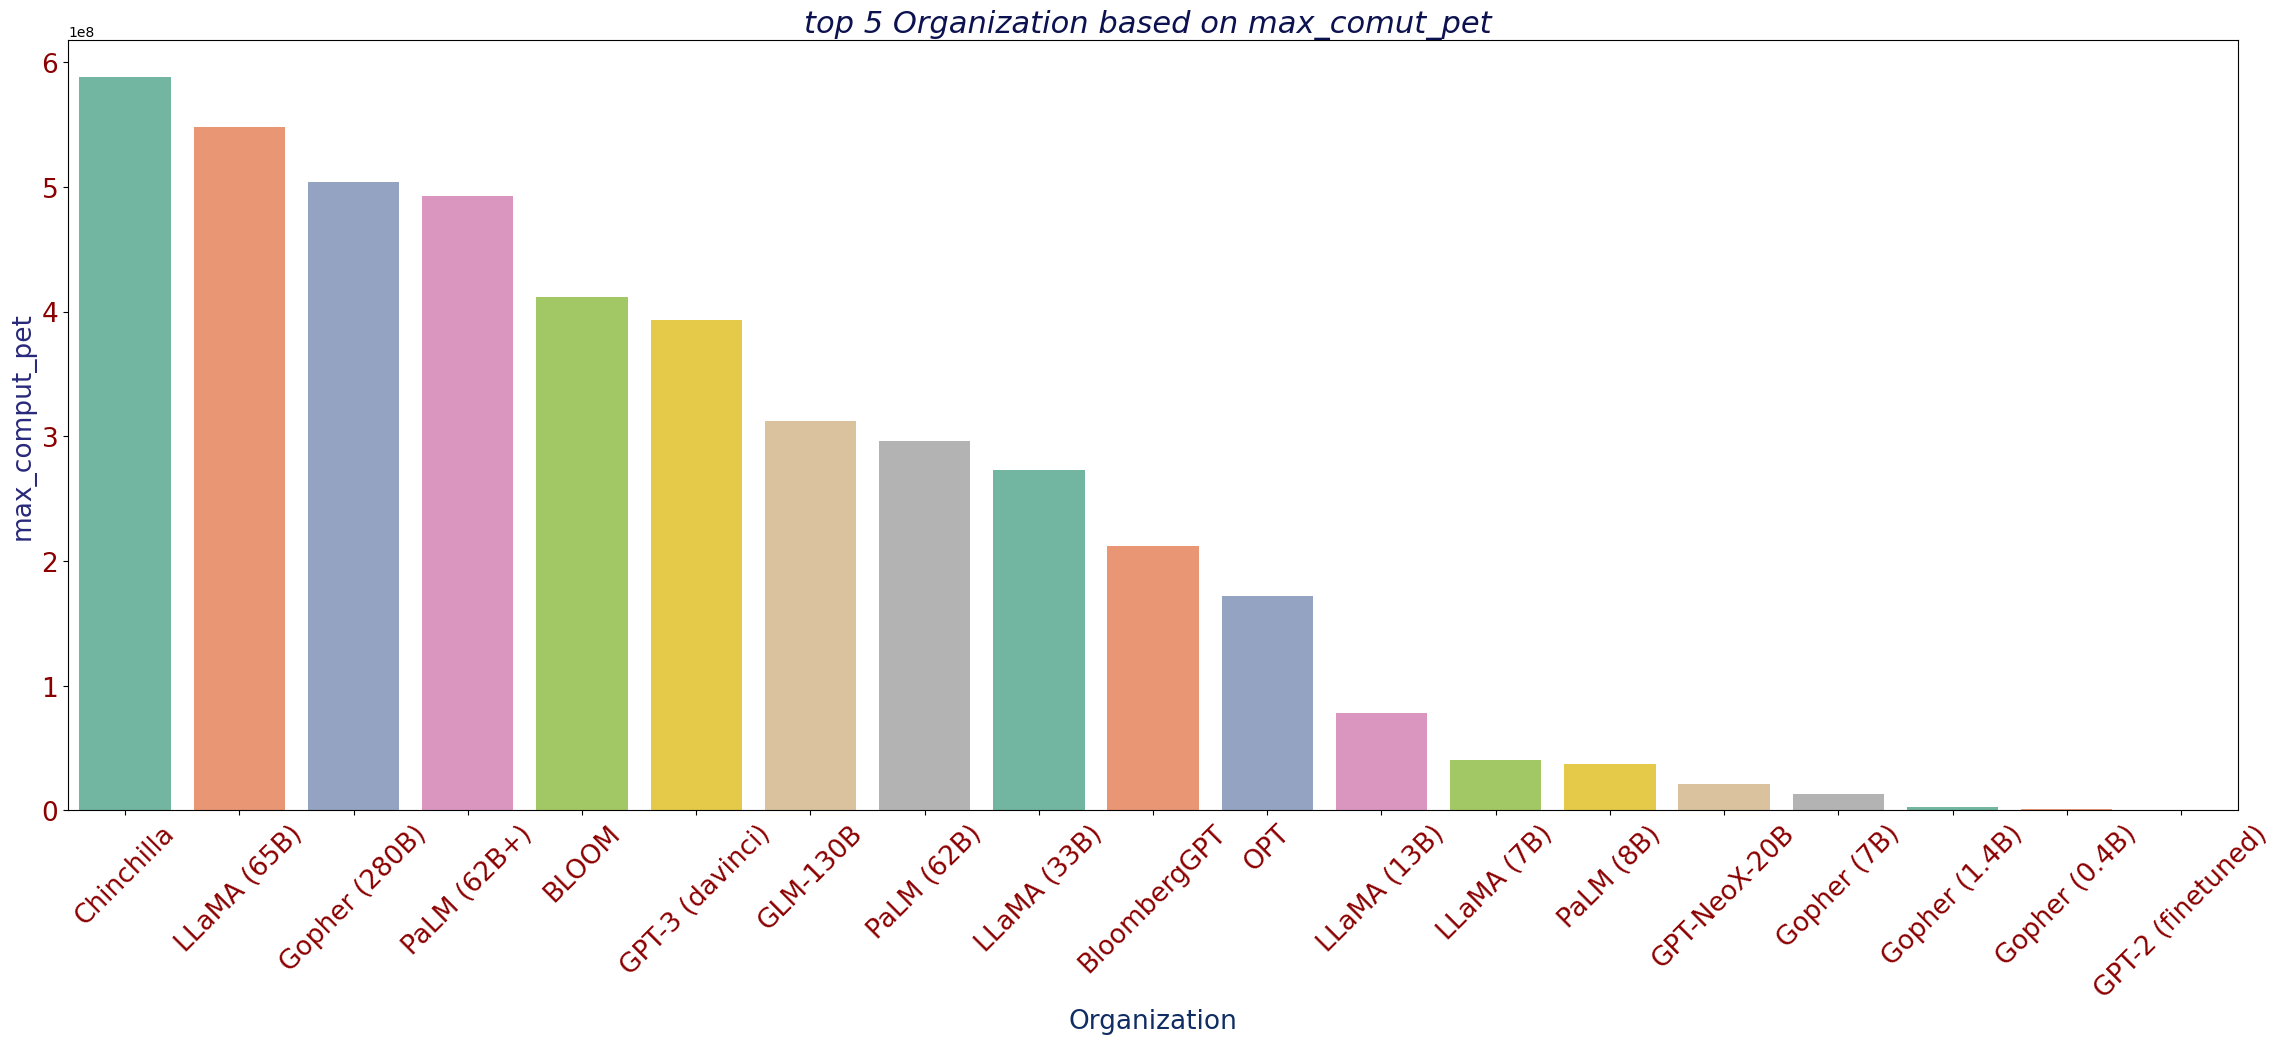

In [ ]:
query4=""" select Entity,
computing_pet,
Organization,max(computing_pet) as max_comut_pet
from xyz.aaai
group by  Entity,computing_pet,Organization
order by max_comut_pet desc;"""

# Set plot title and labels with the specified styling
data=pd.read_sql(query4,conn)
df=pd.DataFrame(data)
print(df.head(5))
fig,ax=plt.subplots(figsize=(28,10))
plt.title("top 5 Organization based on max_comut_pet ",fontsize=22,fontstyle="italic",color="#0C1150")
plt.xlabel("Organization",fontsize=19,color="#102D63")
plt.ylabel("max_comput_pet",fontsize=19,color="#28297A")
plt.xticks(fontsize=19,rotation=45,color="darkred")
plt.yticks(fontsize=19,color="darkred")
sns.barplot(x=df.columns[0],y=df.columns[1],data=df,ax=ax,palette="Set2")




**INSIGHT**

👉Chinchilla (DeepMind, 588M), LLaMA (Meta, 548M), Gopher (Google, 504M) top the compute list.

👉Models like PaLM and BLOOM also rank highly.


#*for each year,find the top  organizatiion by computing power*

   Year     Organization  total_power
0  2023          Meta AI  939200000.0
1  2022  Google Research  826400000.0
2  2021  Google DeepMind  520071000.0
3  2020           OpenAI  393000000.0
4  2019           OpenAI      36000.0


<Axes: title={'center': 'Top 5 organition,total_power '}, xlabel='year', ylabel='Organization'>

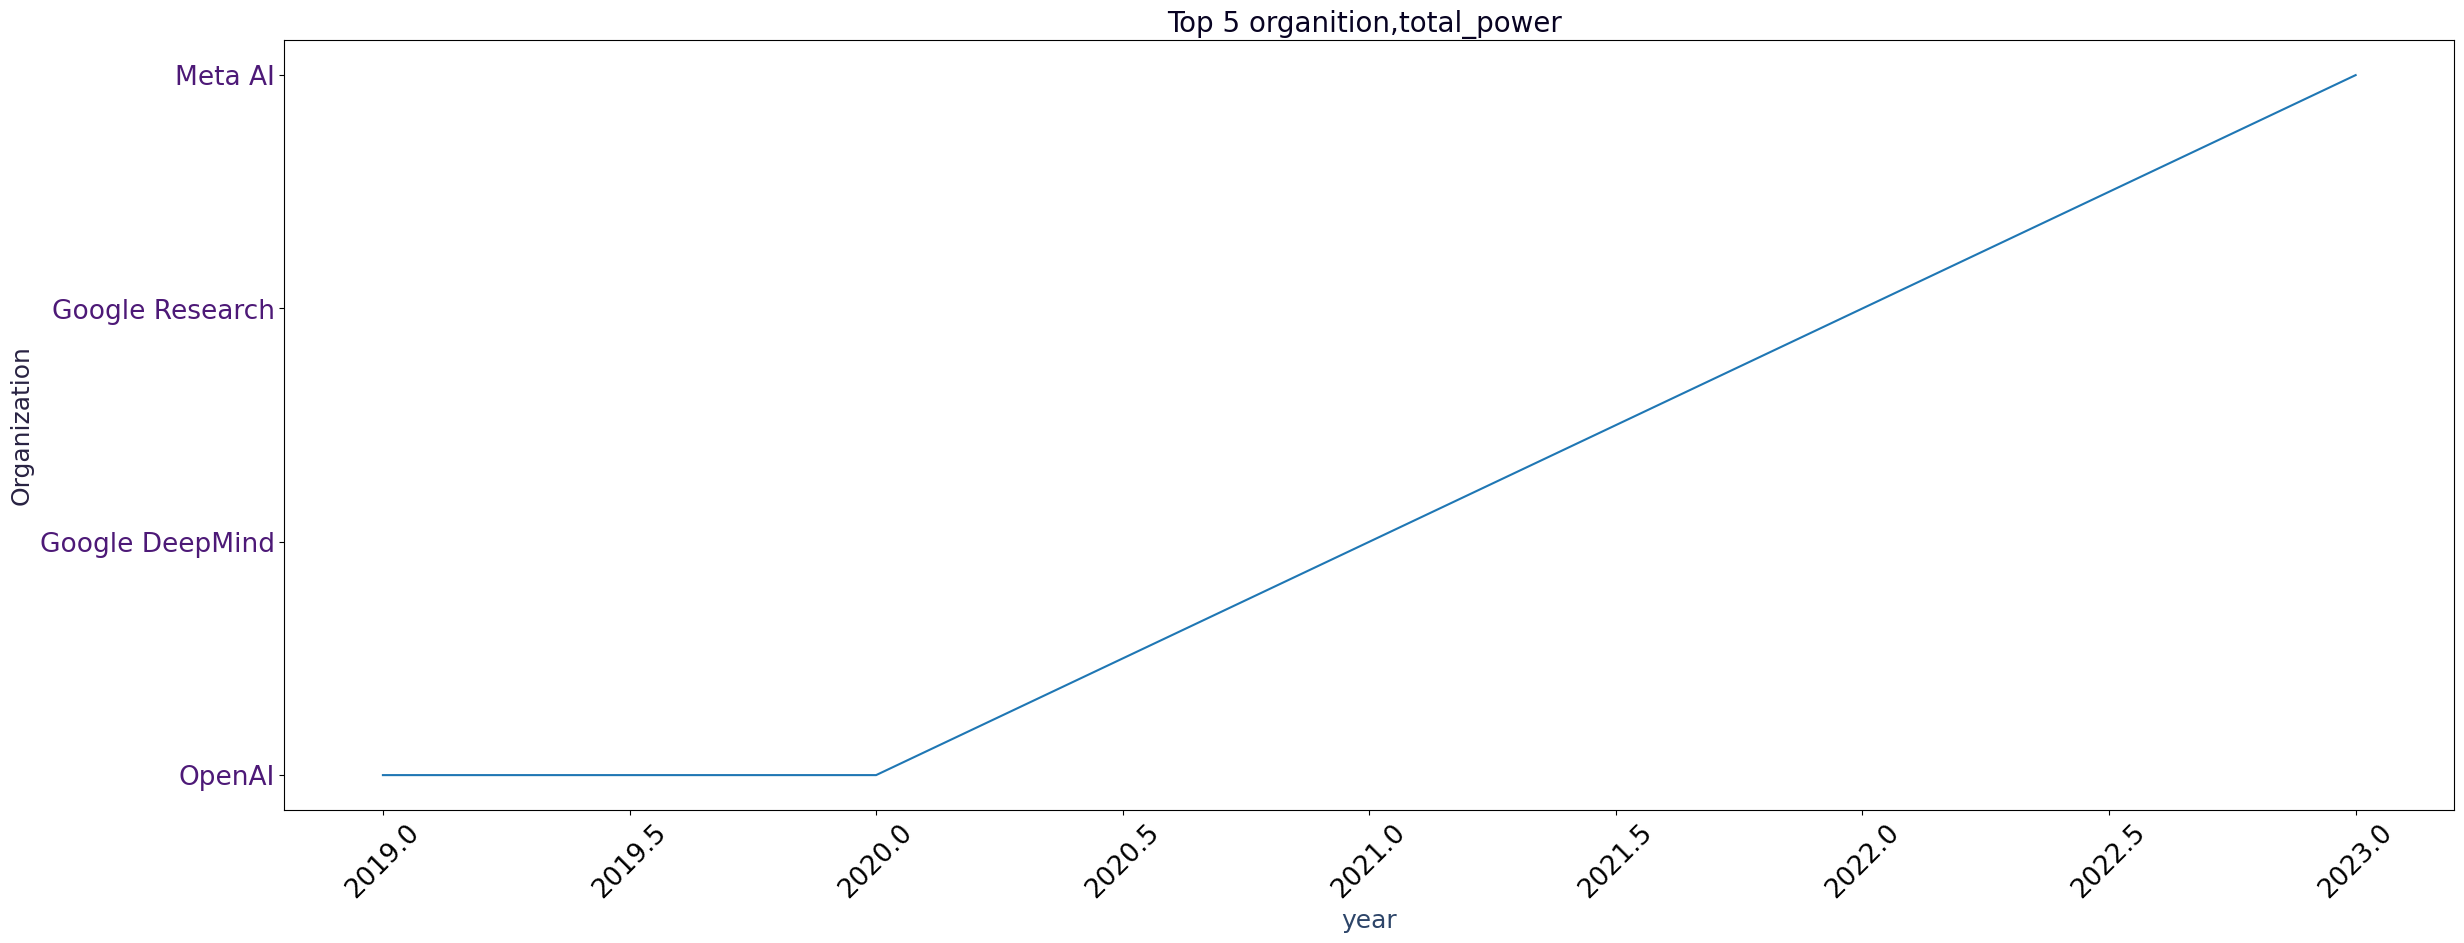

In [ ]:

query5="""select Year ,Organization,total_power
 from(
 select Year,Organization,
 sum(computing_pet) as total_power,
 rank() over (partition by Year order by sum(computing_pet) desc) as rank_org
 from xyz.aaai
 group by Year,Organization)
 rankes  where rank_org=1
 order by total_power desc ;
 """
# Set plot title and labels with the specified styling
data=pd.read_sql(query5,conn)
df=pd.DataFrame(data)
print(df)
fig,ax=plt.subplots(figsize=(28,10))
plt.title("Top 5 organition,total_power ",fontsize=20,color="#080322")
plt.xticks(fontsize=19,rotation=45,color="#000000")
plt.yticks(fontsize=19,color="#4D1977")
plt.xlabel("year",fontsize=18,color="#2D4569")
plt.ylabel("Organization",fontsize=18,color="#282242")
sns.lineplot(x=df.columns[0],y=df.columns[1],data=df,ax=ax,palette="musted")


👉A clear year-on-year increase in computing power usage is observed.

👉The jump is especially sharp in 2020 and 2023 → strong correlation with the release of high-parameter models.


QUE-*show the year by year grwoth of computing power for each organization*

    Year             Organization  total_power  prev_year_power       growth
0   2023                Bloomberg  212000000.0              NaN          NaN
1   2022                 Eleuther   21200000.0              NaN          NaN
2   2021          Google DeepMind  520071000.0              NaN          NaN
3   2022          Google DeepMind  588000000.0      520071000.0   67929000.0
4   2022          Google Research  826400000.0              NaN          NaN
5   2022  HuggingFace, BigScience  412000000.0              NaN          NaN
6   2022                  Meta AI  172000000.0              NaN          NaN
7   2023                  Meta AI  939200000.0      172000000.0  767200000.0
8   2019                   OpenAI      36000.0              NaN          NaN
9   2020                   OpenAI  393000000.0          36000.0  392964000.0
10  2022             Tsinghua KEG  312000000.0              NaN          NaN


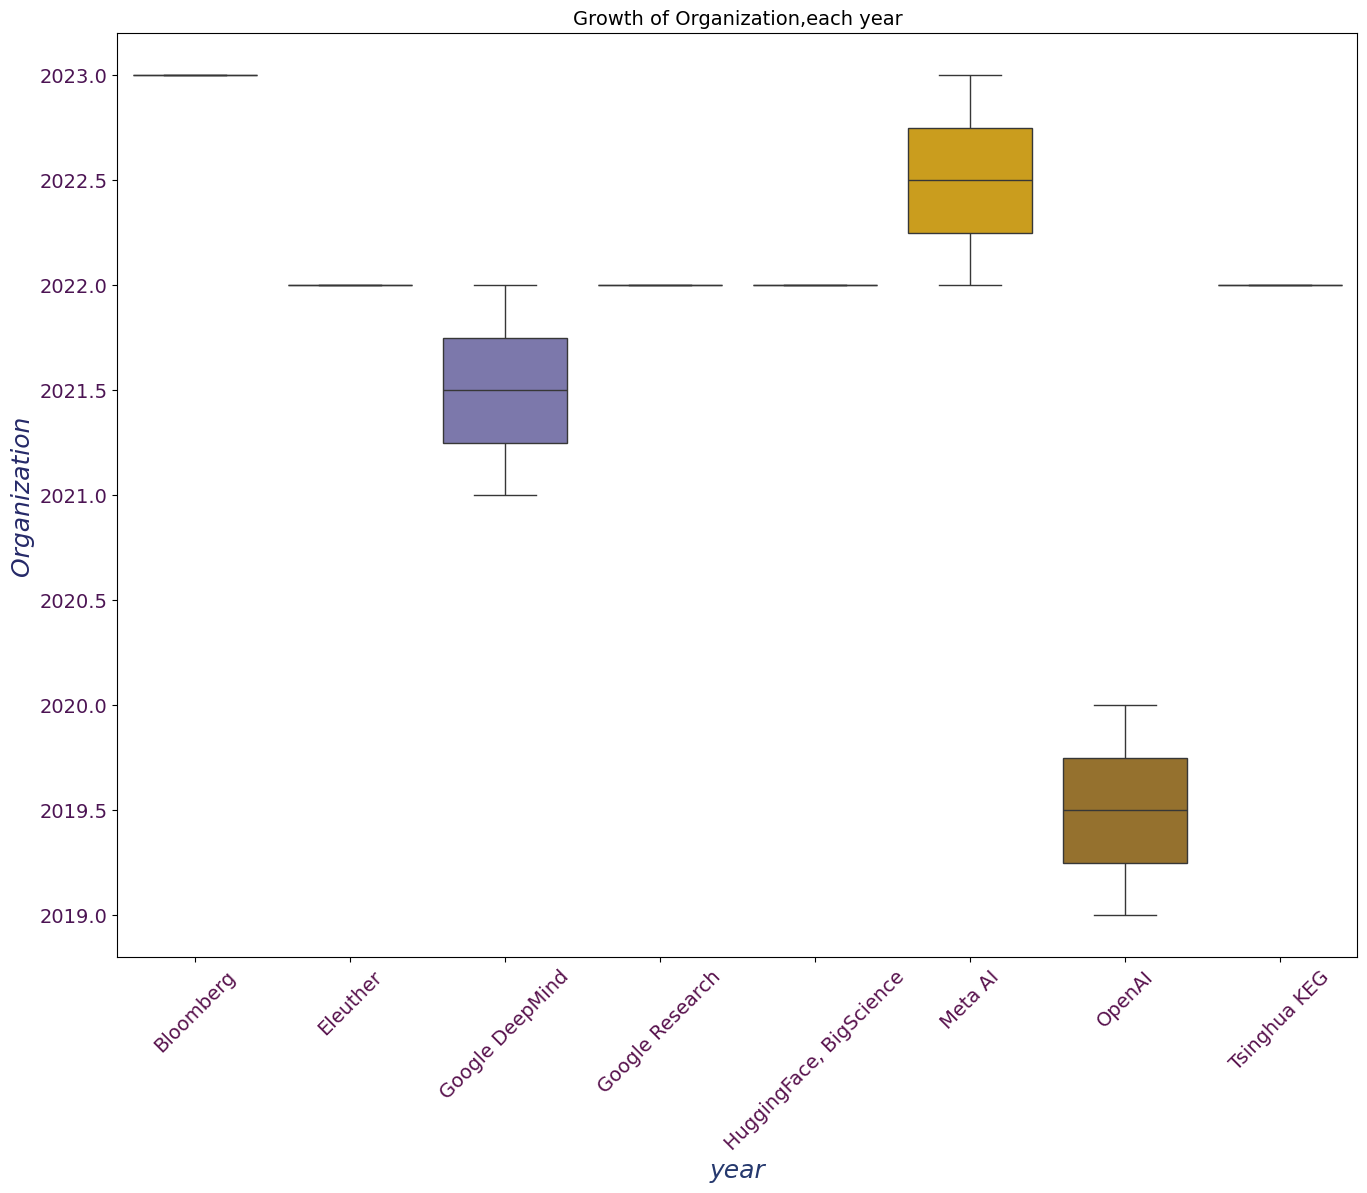

In [ ]:
query6="""select Year,Organization,
sum(computing_pet) as total_power,
lag(sum(computing_pet)) over (partition by Organization order by Year) as prev_year_power,
(sum(computing_pet)-lag(sum(computing_pet)) over (partition by Organization order by Year)) as growth
from xyz.aaai
group by Organization, Year
order by Organization, Year;"""
# Set plot title and labels with the specified styling
fig,ax=plt.subplots(figsize=(16,12))
data=pd.read_sql(query6,conn)
df=pd.DataFrame(data)
print(df)
plt.title( "Growth of Organization,each year",fontsize=14)
plt.xticks(fontsize=14,rotation=45,color="#58124D")
plt.yticks(fontsize=14,color="#4C1453")
plt.xlabel("year",fontsize=18,color="#26396E",fontstyle="italic")
plt.ylabel("Organization",fontsize=18,color="#252968",fontstyle="italic")
sns.boxplot(x=df.columns[1],y=df.columns[0],data=df,ax=ax,palette="Dark2")




**INSIGHT**


👉 Google Research scaled up massively with PaLM.

👉2022 → 2023: Meta AI grew compute by +767M, the biggest jump in the dataset.2021 → 2022:

👉Industry Insight: Compute growth is not linear — it spikes around major LLM releases.

QUE-*find which entities contribute most the computing power*

<Axes: title={'center': 'Organization,Entity based total_power'}, xlabel='Organization', ylabel='Entity'>

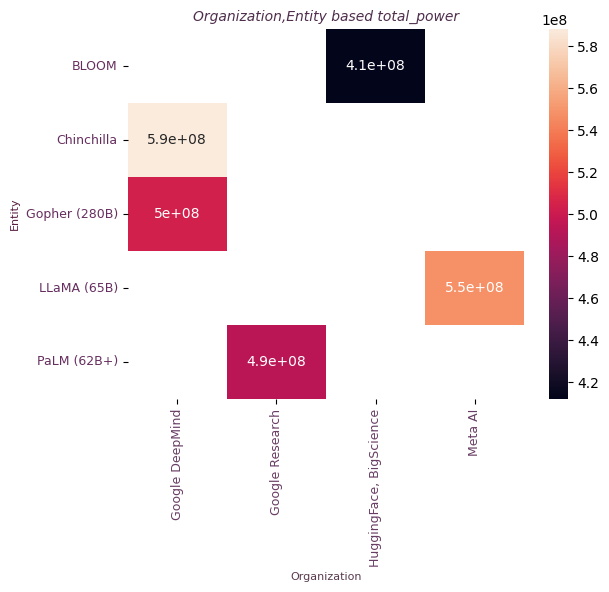

In [ ]:
query7="""select Entity, Organization,
sum(computing_pet) as total_power
from xyz.aaai
group by Entity,Organization
order by  total_power desc
limit 5;"""
# Set plot title and labels with the specified styling
data=data=pd.read_sql(query7,conn)
df=pd.DataFrame(data)
plt.title( "Organization,Entity based total_power",fontsize=10,color="#4E2E4C",fontstyle="italic")
plt.xticks(fontsize=9,rotation=45,color="#683D64")
plt.yticks(fontsize=9,color="#662E5F",rotation=45)
plt.xlabel("Organization",fontsize=8,color="#5A3B4E")
plt.ylabel("Entity",fontsize=8,color="#571C40")
heatmap_data=df.pivot(index="Entity",columns="Organization",values="total_power")
sns.heatmap(heatmap_data,annot=True)

**INSIGHT**

Each year, only 5–6 organizations account for most of the computing resources.

👉Chinchilla (DeepMind, 588M), LLaMA (Meta, 548M), Gopher (Google, 504M) top the compute list.

👉Industry Insight: 2021–22 models consumed unprecedented compute, showing the arms race in scaling LLMs.

QUE-*top 5 contributord ,who contributors most each year*

<Axes: title={'center': ' Top 5 Organization with highest computing_pet'}, xlabel='Organization', ylabel='yearly_comput_pet_data'>

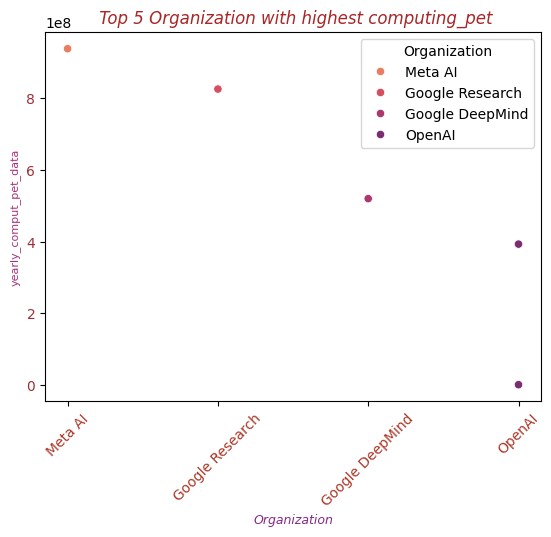

In [ ]:
query8="""select*from(
select year,Organization,
sum(computing_pet) as yearly_data,
rank() over(partition by Year order by sum(computing_pet) desc)as rank_by_year
from xyz.aaai
group by Year,Organization)as ranked
where rank_by_year=1
order by Year desc;"""
# Set plot title and labels with the specified styling
data=data=pd.read_sql(query8,conn)
df=pd.DataFrame(data)
plt.title( " Top 5 Organization with highest computing_pet",fontsize=12,color="#A82626",fontstyle="italic")
plt.xlabel("Organization",fontsize=9,color="#862986",fontstyle="italic")
plt.ylabel("yearly_comput_pet_data",fontsize=8,color="#A7327A")
plt.xticks(fontsize=10,rotation=45,color="#AC3626")
plt.yticks(fontsize=10,color="#9C3036")
sns.scatterplot(x="Organization",y="yearly_data",hue="Organization",data=df,palette="flare")

**INSIGHT**

Chinchilla (DeepMind, 588M), LLaMA (Meta, 548M), Gopher (Google, 504M) top the compute list.

Models like PaLM and BLOOM also rank highly.

Industry Insight: 2021–22 models consumed unprecedented compute, showing the arms race in scaling LLMs.


*SUMMRY*

Scaling drives performance: More compute = better scores.

2022 = peak innovation year, with highest number of new large models.

Leadership shifts: OpenAI (2020) → Google (2021–22) → Meta (2023).

Compute demand exploding: Growth is exponential, not steady